# Airbnb

Founded in 2008, Airbnb’s mission is to create a world where people can belong through healthy travel that is local, authentic, diverse, inclusive and sustainable. Airbnb uniquely leverages technology to economically empower millions of people around the world to unlock and monetize their spaces, passions and talents and become hospitality entrepreneurs. Airbnb’s accommodation marketplace provides access to 7 million unique places to stay in more than 100,000 cities and 191 countries and regions. With Experiences, Airbnb offers unprecedented access to local communities and interests through 40,000 unique, handcrafted activities run by hosts across 1,000+ cities around the world. Airbnb’s people-to-people platform benefits all our stakeholders, including hosts, guests, employees and the communities in which we operate.

## Data Source

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandasql as ps
sns.set()

## Loading data in Python

In [2]:
data = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


## Checking the number of row and columns in the dataset

In [3]:
print(data.shape)

(48895, 16)


This shows that the data set contains 48895 rows and 16 columns

## Checking datatype

In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

With reference to above result, we can see dataset contain 6 categorical variable and 10 qualitative variables

## Confirming the type of features

First, We should try to see how many numeric variables present in the data set. In order to do that we use _get_numeric_data method

In [5]:
numeric_nyc_airbnb=data._get_numeric_data().columns
print(numeric_nyc_airbnb)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


We can confirm that there are 10 numeric features present in the dataset

Now, We would like to check the number of categegorical variable in the dataset

In [6]:
categorical_nyc_airbnb=set(data.columns) - set(numeric_nyc_airbnb)
print(categorical_nyc_airbnb)

{'name', 'host_name', 'last_review', 'neighbourhood_group', 'neighbourhood', 'room_type'}


There are 6 categorical variable in the dataset

## NULL Values identification

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can observe here that datset contains null values. There 16 name field where there is no text in it, similarly there are 10052 records there there is no values in them.

## Dataframe Cleanup

By Intution, we can imagine that ID, host_name, Last_review does not add significant value to the analysis that we will be move forward with. 
In order to make point clear, usually now every listing in the airbnb has a review so that could be a reason there are 10000+ null values in it. Similarly, id field is used only for ditinguishing the rows so we can think of removing them for the dataframe which will improve the compustaional power and code readibility.

In [8]:
data.drop(['id','last_review'], axis=1, inplace=True)

## Checking dataframe after removing column

In [9]:
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Null value replacement

We are hear replacing null value in the 'review_per_month' with 0 for proper represenation

In [10]:
data.fillna({'reviews_per_month':0}, inplace=True)

## Checking the null values in the dataframe

In [11]:
data.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

## Feature Analysis

#### Neighbourbood groups : There 6 neighbourhood group in the dataset

In [12]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

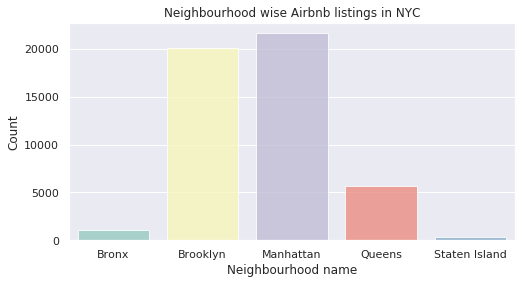

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data.sort_values('neighbourhood_group').neighbourhood_group,palette='Set3',alpha=0.8)
plt.title('Neighbourhood wise Airbnb listings in NYC')
plt.xlabel('Neighbourhood name')
plt.ylabel('Count')
plt.show()

Above graph show that Manhattan has the highest number of listing followed by Brooklyn and Queens

### Graphical represenation of neighbourhood groups

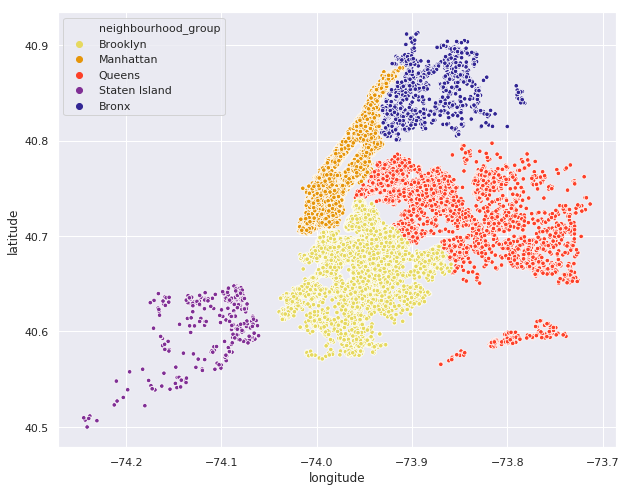

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude',hue='neighbourhood_group',s=20,palette='CMRmap_r', data=data)

#### Room Type: There are 3 different types of rooms mentioned in the dataset

In [15]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

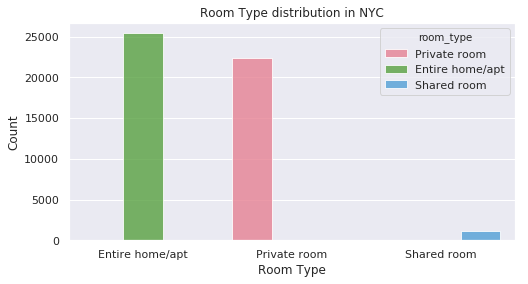

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data.sort_values('room_type').room_type,palette='husl', hue=data.room_type,alpha=0.8)
plt.title('Room Type distribution in NYC')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

From the above graph, we can observe that Airbnb has listed high number of entire apartments then private rooms and shared rooms are far more less compared to the other types

## Graphical distribution of rooms in New York

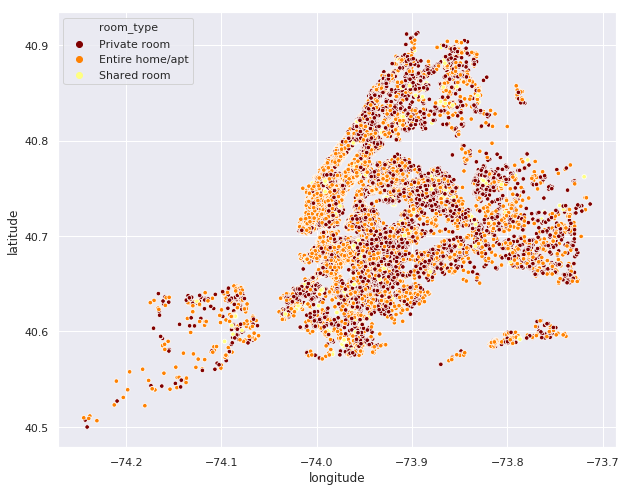

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude',hue='room_type',palette='afmhot',s=20, data=data)

#### Neighbours :  There are several distinct neighbours clustered into neighbour groups mentioned above 

In [18]:
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

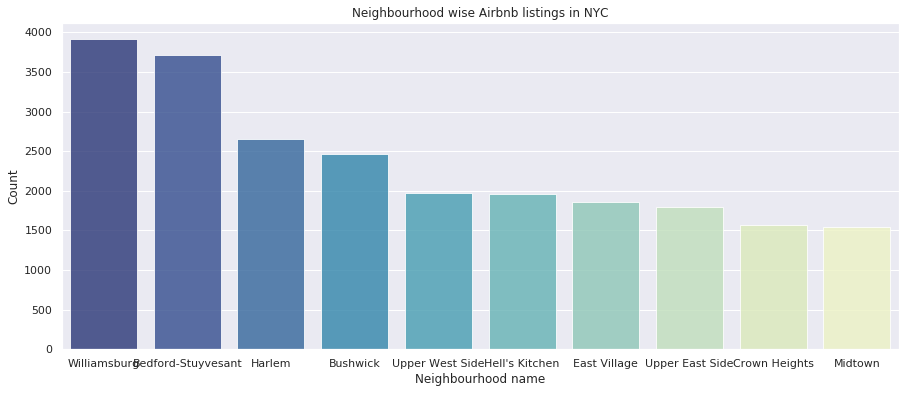

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data.sort_values('neighbourhood').neighbourhood, order=data['neighbourhood'].value_counts().iloc[:10].index ,palette='YlGnBu_r',alpha=0.8)
plt.title('Neighbourhood wise Airbnb listings in NYC')
plt.xlabel('Neighbourhood name')
plt.ylabel('Count')
plt.show()

Among all the neighbourhoods of New York, 'Willamsburg' has the highest number of listing followed by 'Bedford-Stuyvesant' and 'Harlem'

#### Name Listing

In [20]:
name_count=data.name.value_counts().head(10)
name_count

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Private room in Brooklyn                       8
Private room in Williamsburg                   8
Name: name, dtype: int64

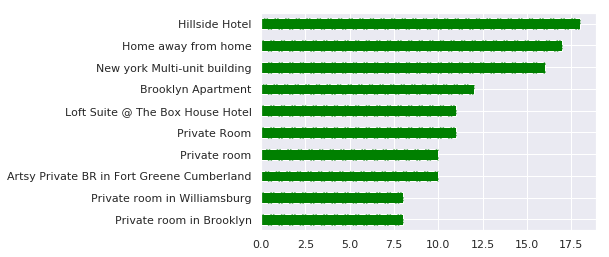

In [21]:
plt.grid(b=None)
data['name'].value_counts()[:10].sort_values().plot(kind='barh', color='green', linestyle='-.')

#### Host : list of top hosts

The above graph shows that Hillside Hotel has the highest number of listing followed by 'Home away from home'

In [22]:
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

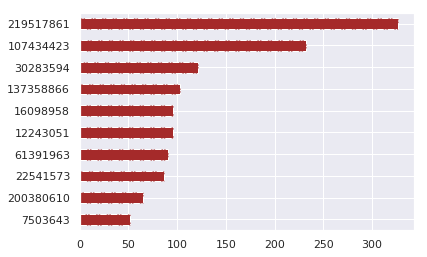

In [23]:
plt.grid(b=None)
data['host_id'].value_counts()[:10].sort_values().plot(kind='barh', color='Brown', linestyle='-.')

Host with id '219517861' has highest number of listing followed by hosr with id 107434423

### Distribution of room type based on Neighbourhood groups

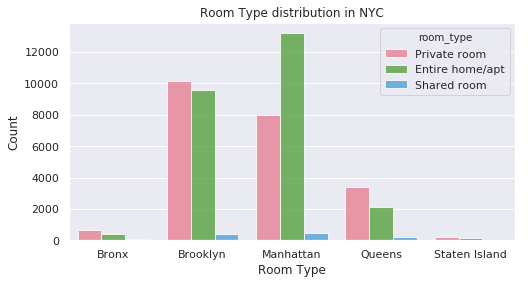

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(data.sort_values('neighbourhood_group').neighbourhood_group,hue=data.room_type, palette='husl',alpha=0.8)
plt.title('Room Type distribution in NYC')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

With reference to above graph we can observe that Manhattan has highest number of listed rooms with type 'Entire Apartment' where as Brooklyn has highest number of Private rooms.
Presence of shared room in all the neighbourhood group is comparatively very very less.

### Price Distribution

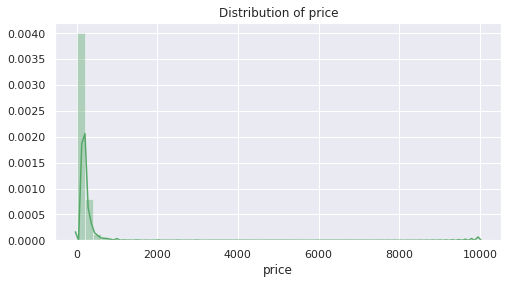

In [25]:
plt.figure(figsize=(8,4))
sns.distplot(data.price, color='g')
plt.title('Distribution of price')
plt.show()

Price is skewed towards right with reference to above graph

#### Log transformation of Price : In order to normalize data we are trying to use log transformation

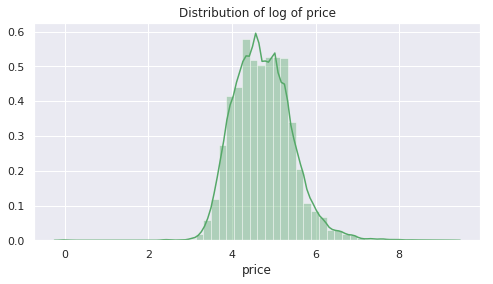

In [26]:
plt.figure(figsize=(8,4))
sns.distplot(np.log1p(data['price']),color='g')
plt.title('Distribution of log of price')
plt.show()

After log transformation, distribution of price seems to be normal

### Minimum night distribution

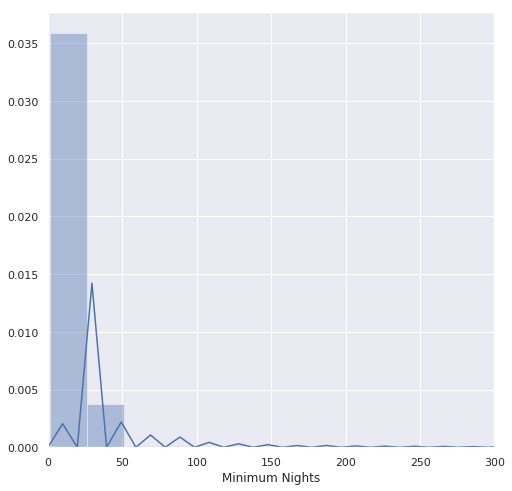

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(data['minimum_nights'], color='b')
plt.xlabel('Minimum Nights')
plt.xlim(0,300)
plt.show()

We can observe here that minimum night distribtion is significantly scewed towards right

#### Log transformation of minimum nights : In order to normalize data we are trying to use log transformation

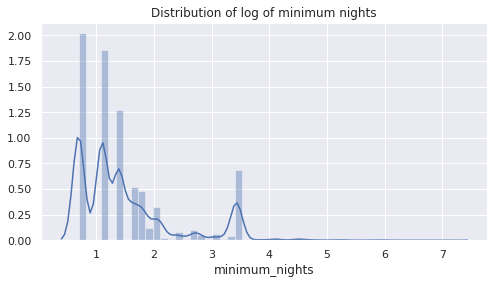

In [28]:
plt.figure(figsize=(8,4))
sns.distplot(np.log1p(data['minimum_nights']),color='b')
plt.title('Distribution of log of minimum nights')
plt.show()

Here athough the distribution is still skewed towards right but the transformation skewness has reduced

### Distribution of number of nights

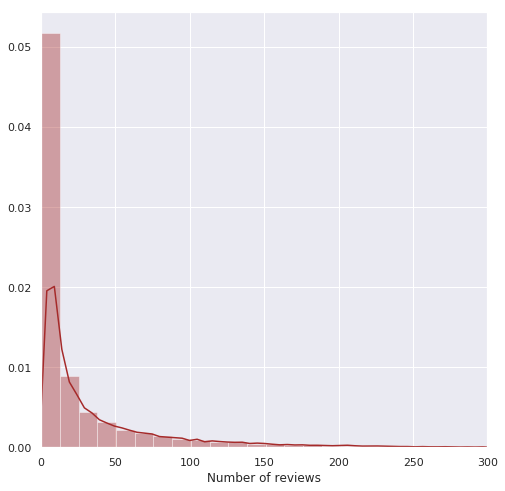

In [29]:
plt.figure(figsize=(8,8))
sns.distplot(data['number_of_reviews'], color='brown')
plt.xlabel('Number of reviews')
plt.xlim(0,300)
plt.show()

Distribution is significantly skewed towards right

#### Log tranformation of 'number of reviews'

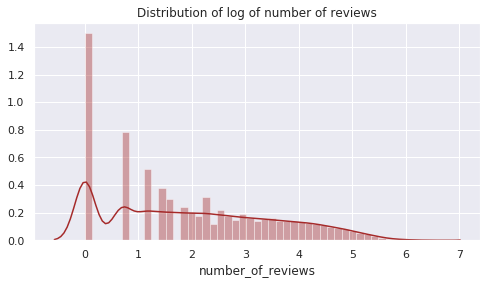

In [30]:
plt.figure(figsize=(8,4))
sns.distplot(np.log1p(data['number_of_reviews']),color='brown')
plt.title('Distribution of log of number of reviews')
plt.show()

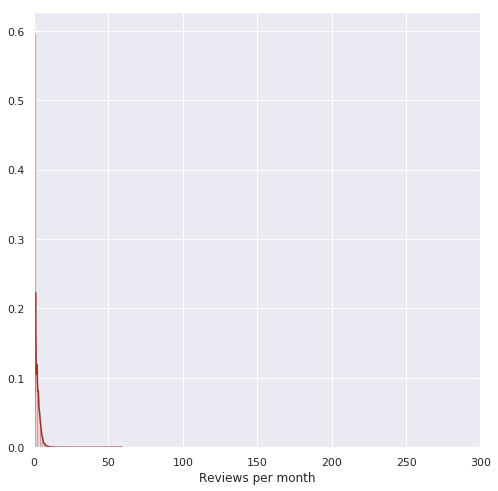

In [31]:
plt.figure(figsize=(8,8))
sns.distplot(data['reviews_per_month'], color='brown')
plt.xlabel('Reviews per month')
plt.xlim(0,300)
plt.show()

## Correlation

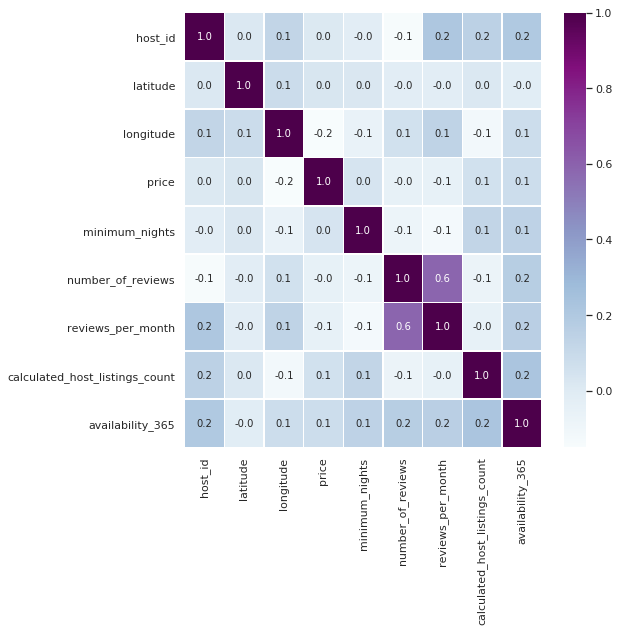

In [32]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="BuPu")
plt.show()

As we can see, features of the datasets are not significantly correlated expect only 'number of review' and 'reviews per month'

To be continued..
Working on further analysis and will keep updating this workbook
Thank You!